# Preprocess

In [ ]:
import pandas as pd

splits = {'train': 'data/train.parquet', 'validation': 'data/validation.parquet', 'test': 'data/test.parquet'}
train_df = pd.read_parquet("hf://datasets/Teklia/IAM-line/" + splits["train"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
train_df = train_df.head(1000)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1000 non-null   object
 1   image   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [ ]:
train_df.head()

,text,image
0,put down a resolution on the subject,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
1,and he is to be backed by Mr. Will,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
2,nominating any more Labour life Peers,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
3,M Ps tomorrow. Mr. Michael Foot has,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...
4,"Griffiths, M P for Manchester Exchange .",{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...


In [ ]:
train_df.iloc[0, 1]

{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xc0\x00\x0b\x08\x00\x80\t\xa3\x01\x01\x11\x00\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe1\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf1\xf2\xf3\xf4\xf5\xf6\xf7\xf8\xf9\xfa\xff\xda\x

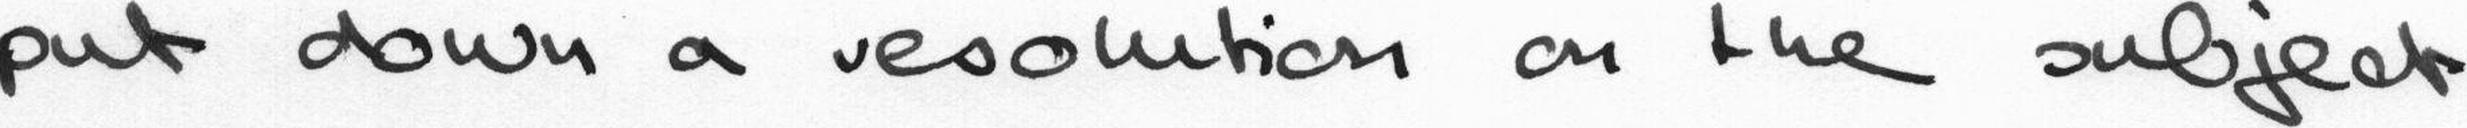

In [ ]:
import io
from PIL import Image
# import matplotlib.pyplot as plt

image_bytes = train_df.iloc[0, 1]["bytes"]
image = Image.open(io.BytesIO(image_bytes))

image

In [ ]:
image.size

(2467, 128)

In [ ]:
# !pip install --upgrade torch

In [ ]:
# !pip install --upgrade torchvision

In [ ]:
# !pip install --upgrade sympy

In [ ]:
import torch
import torch.nn as nn

In [ ]:
# from PIL import Image
# import io

# class BytesToPILImage:
#     def __call__(self, image_bytes):
#         image = Image.open(io.BytesIO(image_bytes))
#         return image

In [ ]:
class ImageObject:
    def __call__(self, image_dict):
        image_bytes = image_dict["bytes"]
        return Image.open(io.BytesIO(image_bytes))

In [ ]:
import torchvision.transforms as T

In [ ]:
# Define the transform: resize to (64, 512) and convert to tensor
image_preprocessor = T.Compose([
    ImageObject(),
    T.Resize((64, 512)),  # (height, width)
    T.ToTensor()
])

In [ ]:
test_image_after_preprocessing = image_preprocessor(train_df.iloc[0, 1])
test_image_after_preprocessing.size()

torch.Size([1, 64, 512])

In [ ]:
train_df["image"] = train_df["image"].apply(image_preprocessor)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1000 non-null   object
 1   image   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [ ]:
valid_df = pd.read_parquet("hf://datasets/Teklia/IAM-line/" + splits["validation"])
test_df = pd.read_parquet("hf://datasets/Teklia/IAM-line/" + splits["test"])
print(valid_df.shape, test_df.shape)

(976, 2) (2915, 2)


In [ ]:
valid_df = valid_df.tail(500)
test_df = test_df.tail(1000)

In [ ]:
valid_df["image"] = valid_df["image"].apply(image_preprocessor)
test_df["image"] = test_df["image"].apply(image_preprocessor)
# valid_df.info()

In [ ]:
valid_df.head()

,text,image
476,"or B in the finals next May , and since mating","[[[tensor(0.9804), tensor(0.9843), tensor(0.98..."
477,way in Harry's mind ) had these splendid young,"[[[tensor(0.9804), tensor(0.9804), tensor(0.97..."
478,"with black , matted hair and a striking","[[[tensor(1.), tensor(1.), tensor(1.), tensor(..."
479,hesitation in saying that they would have,"[[[tensor(0.9922), tensor(1.), tensor(1.), ten..."
480,resemblance to the shrunk heads we had,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(..."


In [ ]:
valid_df = valid_df.reset_index(drop = True)
valid_df.head()

,text,image
0,"or B in the finals next May , and since mating","[[[tensor(0.9804), tensor(0.9843), tensor(0.98..."
1,way in Harry's mind ) had these splendid young,"[[[tensor(0.9804), tensor(0.9804), tensor(0.97..."
2,"with black , matted hair and a striking","[[[tensor(1.), tensor(1.), tensor(1.), tensor(..."
3,hesitation in saying that they would have,"[[[tensor(0.9922), tensor(1.), tensor(1.), ten..."
4,resemblance to the shrunk heads we had,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(..."


In [ ]:
test_df = test_df.reset_index(drop = True)
# test_df.head()

In [ ]:
test_df.iloc[0, 1]

tensor([[[0.9843, 0.9765, 0.9843,  ..., 0.9843, 0.9843, 0.9804],
         [0.9843, 0.9765, 0.9843,  ..., 0.9843, 0.9882, 0.9843],
         [0.9843, 0.9765, 0.9843,  ..., 0.9843, 0.9882, 0.9843],
         ...,
         [0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9843],
         [0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9843],
         [0.9843, 0.9843, 0.9843,  ..., 0.9843, 0.9843, 0.9843]]])

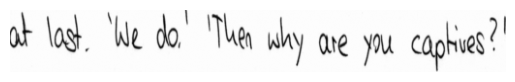

In [ ]:
import matplotlib.pyplot as plt
image_to_show = test_df.iloc[0, -1].permute(1, 2, 0)
plt.imshow(image_to_show.squeeze(), cmap = "gray")
plt.axis("off")
plt.show()

In [ ]:
set("Aa21324342sSdfd123ds")

{'1', '2', '3', '4', 'A', 'S', 'a', 'd', 'f', 's'}

In [ ]:
type({})

dict

In [ ]:
chars = set()
for df in [train_df, valid_df, test_df]:
    for text in df["text"]:
        chars.update(set(text))

In [ ]:
len(chars)

76

In [ ]:
print(chars)

{'J', 'H', 'S', '8', '!', '4', 'W', '7', '.', 'F', 'P', 'B', 'x', 'b', '0', ';', 'A', 'u', 'O', 'L', ' ', '-', '1', 'X', 'h', ':', 'Y', 'R', 'y', 's', 'E', 'f', 'e', 'n', 'D', 'p', 'V', 'q', 'c', '(', 'U', 'g', 'l', 'G', '9', 'I', 'r', '6', 'T', '#', "'", 'C', 'j', 'K', 'z', 'Z', 'k', 'w', ')', '5', '2', 'd', 't', ',', 'v', 'N', '?', 'Q', '3', 'm', '"', '*', 'a', 'o', 'M', 'i'}


In [ ]:
chars = sorted(list(chars))
print(chars)

[' ', '!', '"', '#', "'", '(', ')', '*', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [ ]:
idx_to_char = {idx: char for idx, char in enumerate(chars)}
char_to_idx = {char: idx for idx, char in idx_to_char.items()}

In [ ]:
idx_to_char[0]

' '

In [ ]:
char_to_idx["a"]

50

In [ ]:
num_chars = 100

# Model

In [ ]:
import torchvision.models as models
from torch.nn import TransformerEncoder, TransformerEncoderLayer
import math

In [ ]:
resnet_children = list(models.resnet18(weights = None).children())
resnet_children

[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 ReLU(inplace=True),
 MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False),
 Sequential(
   (0): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   )
   (1): BasicBlock(
     (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
     (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     (relu): ReLU(inplace=True)
     (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), pad

In [ ]:
len(resnet_children)

10

In [ ]:
resnet_children[-1]

Linear(in_features=512, out_features=1000, bias=True)

In [ ]:
resnet_children[-2]

AdaptiveAvgPool2d(output_size=(1, 1))

In [ ]:
class HTRVT_CNNFeatureExtractor(nn.Module):
    def __init__(self):
        super().__init__()
        resnet = models.resnet18(weights=None)

        # Modified ResNet-18 architecture
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False),  # Grayscale input
            *list(resnet.children())[1:-2]  # Remove final layers
        )

        # Adjust stride in last layer
        self.feature_extractor[7][0].conv1.stride = (1, 1)
        self.feature_extractor[7][0].downsample[0].stride = (1, 1)

    def forward(self, x):
        # Input: (B, 1, 64, 512)
        features = self.feature_extractor(x)  # (B, 512, 4, 32)
        B, C, H, W = features.size()
        return features.view(B, C, H * W).permute(0, 2, 1)  # (B, L, C)

class HTRVT_TransformerEncoder(nn.Module):
    def __init__(self, num_layers=4, d_model=768, nhead=6, dim_feedforward=3072):
        super().__init__()
        self.pos_encoder = PositionalEncoding(d_model)
        encoder_layers = TransformerEncoderLayer(
            d_model, nhead, dim_feedforward, activation="gelu", batch_first=True
        )
        self.transformer_encoder = TransformerEncoder(encoder_layers, num_layers)

    def forward(self, src):
        src = self.pos_encoder(src)
        return self.transformer_encoder(src)

class PositionalEncoding(nn.Module):
    def __init__(self, d_model: int, max_len: int = 512):
        super().__init__()
        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, d_model)
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = x + self.pe[:x.size(1)]
        return x

class HTRVT(nn.Module):
    def __init__(self, num_chars, mask_ratio=0.4, max_span_length=8):
        super().__init__()
        self.cnn = HTRVT_CNNFeatureExtractor()
        self.projection = nn.Linear(num_chars, 768)
        self.transformer = HTRVT_TransformerEncoder()
        self.classifier = nn.Linear(768, num_chars + 1)  # +1 for CTC blank

        # Span masking components
        self.mask_ratio = mask_ratio
        self.max_span_length = max_span_length
        self.mask_token = nn.Parameter(torch.randn(num_chars))

    def forward(self, x, apply_mask=True):
        # Feature extraction
        features = self.cnn(x)  # (B, L, C)

        # Span masking (training only)
        if self.training and apply_mask:
            features = self.span_masking(features)

        # Transformer processing
        features = self.projection(features)
        encoded = self.transformer(features)

        # Classification
        logits = self.classifier(encoded)
        return logits.permute(1, 0, 2)  # (T, B, C) for CTC

    def span_masking(self, features):
        B, L, C = features.size()
        num_masked = int(L * self.mask_ratio)

        # Generate span masks
        masked_indices = []
        while len(masked_indices) < num_masked:
            span_length = min(self.max_span_length, num_masked - len(masked_indices))
            start = torch.randint(0, L - span_length + 1, (1,))
            end = start + span_length
            masked_indices.extend(range(start, end))

        # Apply masking
        mask = torch.zeros(L, dtype=torch.bool)
        mask[masked_indices[:num_masked]] = True
        features[:, mask] = self.mask_token
        return features

In [ ]:
!pip install sam-pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

# Training

In [ ]:
from torch.optim import AdamW
from torch.nn import CTCLoss
from sam import SAM

In [ ]:
# num_chars = 512

In [ ]:
model = HTRVT(num_chars=num_chars)
loss_fn = CTCLoss(blank = num_chars + 1)
base_optimizer = AdamW(model.parameters(), lr=1e-3)
optimizer = SAM(model.parameters(), base_optimizer)

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
x = torch.tensor(5)
print(x)
print(x.shape)

tensor(5)
torch.Size([])


In [ ]:
class ImageTextDataset(Dataset):
    def __init__(self, df):
        self.images = df['image'].tolist()
        self.labels = [torch.tensor([char_to_idx[c] for c in txt]) for txt in df['text']]
        self.target_lengths = [torch.tensor(len(txt)) for txt in df['text']]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx], self.target_lengths[idx]

# def collate_fn(batch):
#     images, labels = zip(*batch)
#     return torch.stack(images), list(labels)

# Create DataLoaders
train_loader = DataLoader(ImageTextDataset(train_df), batch_size=32,
                         shuffle=True)
valid_loader = DataLoader(ImageTextDataset(valid_df), batch_size=32,
                         shuffle=False)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

for epoch in range(5):
    # Training
    model.train()
    for images, labels in train_loader:
        images = images.to(device)
        outputs = model(images)
        loss = loss_fn(outputs, labels, torch.tensor(list(map(len, outputs))), torch.tensor(list(map(len, labels))))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_loss = 0
        for images, labels in valid_loader:
            images = images.to(device)
            outputs = model(images)
            val_loss += loss_fn(outputs, labels).item()

    print(f"Epoch {epoch+1}/5 | Val Loss: {val_loss/len(valid_loader):.4f}")

RuntimeError: stack expects each tensor to be equal size, but got [34] at entry 0 and [44] at entry 1